### About 

- This script extracts 12S rRNA gene positions corresponding to reference sequence (NC_002333 - *Danio rerio* mitochondrion, complete genome) from **blastn-short** output. 

- The script will evaluate alignment(s) with the best bit score. If there is only one alignment with the best bit score, it will extract positions from the best alignment. If >1 alignment share the best bit score (i.e. multiple best matches), the script will extract the earliest start position and latest end position.

- The start of the 12S rRNA gene (alignment position #1) corresponds to the position 1,020 on the *Danio rerio* mitogenome and the end of the 12S rRNA gene (alignment position #952) corresponds to position 1,971 on the *Danio rerio* mitogenome.

- MiFish amplicon region (including primers) are between positions 224-420 on the *Danio rerio* reference.

```
>NC_002333.2:1020-1971 Danio rerio mitochondrion, complete genome
CAAAGGCATGGTCCCGACCTTTTGATCAGCTTTTACCTAATTTACACATGCAAGTCTCCGCACCCCTGTG
AATACGCCCTCAATCCCCAAACCTGGGGACGAGGAGCAGGTATCAGGCACAAAATTTTTAGCCCAAGACG
CCTAGCCAAGCCACACCCCCAAGGGGATCCAGCAGTGACAAACATTAAGCTATAAGTGAAAACTTGACTC
AGTTAAGGTAAAGAGAGCCGGTAAAACTCGTGCCAGCAACCGCGGTTAAACGAGAGGCTCTAGTTGATAT
ACTACGGCGTAAAGGGTGGTTAAGGAACAATGTAAAATAAAGCCAAACGGCCCTTTAACTGTTATACGCT
TTTAGATGCTAGAGGCCCAAACACGAAAGTAGCTTTAAATTAATTACCTGAACCCACGAAAGCTAAGAAA
CAAACTGGGATTAGATACCCCACTATGCTTAGCCATAAACAAAGACATTTAATCACAACAATGTTCGCCC
GGACACTACAAGCATAAGCTTAAAACCCAAAGGACCTGACGGTGCCTTAGATCCCCCTAGAGGAGCCTGT
TCTAGAACCGATTATCCCCGTTAAACCTCACCATTTCTAGCAAAATCAGCCTATATACCACCGTCGCCAG
CTTACCCTGTGAAGGAATAACAGTAAGCAAGATGGGCATAGCCCAGAAAGTCAGGTCGAGGTGTAGCACA
TGAAATGGGAAGAAATGGGCTACACTTTCTACCCCAGAATATACGAAAATGTAACATGAAACAATACTTG
AAGGAGGATTTAGCAGTAAAAGAGAAGCAGAGTGTCTCTTTGAACCCGGCTCTAAGGCGCGTACACACCG
CCCGTCACTCCCTCCGGTCAATTGCACAAGAAATAATTAATACAGAAGCACAGACAAGGGGGGAAAAGTC
GTAACAAGGTAAGTGTACCGGAAGGTGCACTTGGACATTATC
```

### Test cases
- MT157320 - *Acrourus whitsoni* mitochondrion, complete genome
```
Random record with complete mitogenome
```
- AB938103 - *Prionace glauca* mitochondrial gene for 12S rRNA, partial sequence 
```
AB938103 was sequenced with MiFish primers and the primer sequences were truncated from the record. blastn-short shows multiple short matches with equal blast scores (see below). In this case, the script will identify position #249 as the alignment start position and position #348 as the alignment end position.
```
```
query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score
AB938103	NC_002333.2:1020-1971	93.750	16	1	0	2	17	249	264	0.008	24.3
AB938103	NC_002333.2:1020-1971	100.000	12	0	0	94	105	337	348	0.008	24.3
AB938103	NC_002333.2:1020-1971	89.474	19	2	0	38	56	285	303	0.032	22.3
```



In [2]:
# Mount Google Drive so colab can read and write files onto Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
allhits='/content/drive/My Drive/Colab Notebooks/blastnshort.12S.tsv'
output='/content/drive/My Drive/Colab Notebooks/12Spositions.tsv'

hits=tuple(open(allhits,'r'))
outfile=open(output,'a')

i = 0
seen=set()

while (i < len(hits)):
  full=str(hits[i]).rsplit("\t")
  acc=str(full[0])
  sstart=int(full[8])
  send=int(full[9])
  score=float(full[11])

  if (acc not in seen):
    if (i>0):
        outfile.write("%s\t%s\t%s\n" % (query,startmin,endmax))
    
    if (i>=0):
      seen.add(acc)	
      query=acc
      startmin=int(sstart)
      endmax=int(send)
      lastscore=float(score)

  if (acc==query and score==lastscore):
    startmin=min(startmin,sstart)
    endmax=max(endmax,send)
  
  if (i==(len(hits)-1)):
    outfile.write("%s\t%s\t%s\n" % (query,startmin,endmax))
  
  i += 1

outfile.close()

    Accession PositionType  Position
0   Zebrafish        Start         1
1    AB006953        Start         1
2    AB015962        Start       421
3    AB016274        Start       547
4    AB018224        Start       170
5    AB018225        Start       170
6   Zebrafish          End       952
7    AB006953          End       945
8    AB015962          End       733
9    AB016274          End       637
10   AB018224          End       304
11   AB018225          End       304


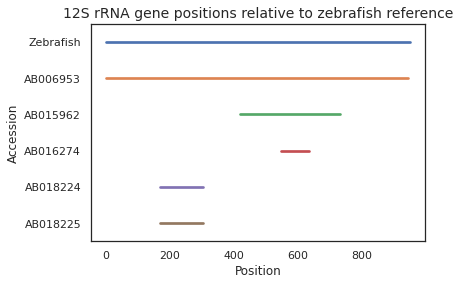

In [128]:
# Testing out plot functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

positions=pd.read_table('/content/drive/My Drive/Colab Notebooks/testpos.tsv')
positions=pd.melt(positions,"Accession",var_name="PositionType")
positions.columns=['Accession','PositionType','Position']
print(positions)

sns.set(style="white")

posplot=sns.pointplot(x="Position", y="Accession", hue="Accession", markers="", data=positions)
posplot.legend_.remove()
plt.title("12S rRNA gene positions relative to zebrafish reference", size=14)

plt.savefig('/content/drive/My Drive/Colab Notebooks/testplot.pdf',bbox_inches='tight')
